In [37]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as pyplot
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
import warnings
warnings.filterwarnings('ignore')

In [38]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 15\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [39]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
columns=['ShelveLoc','Urban','US']
for i in columns:
  data[i]=lb.fit_transform(data[i])

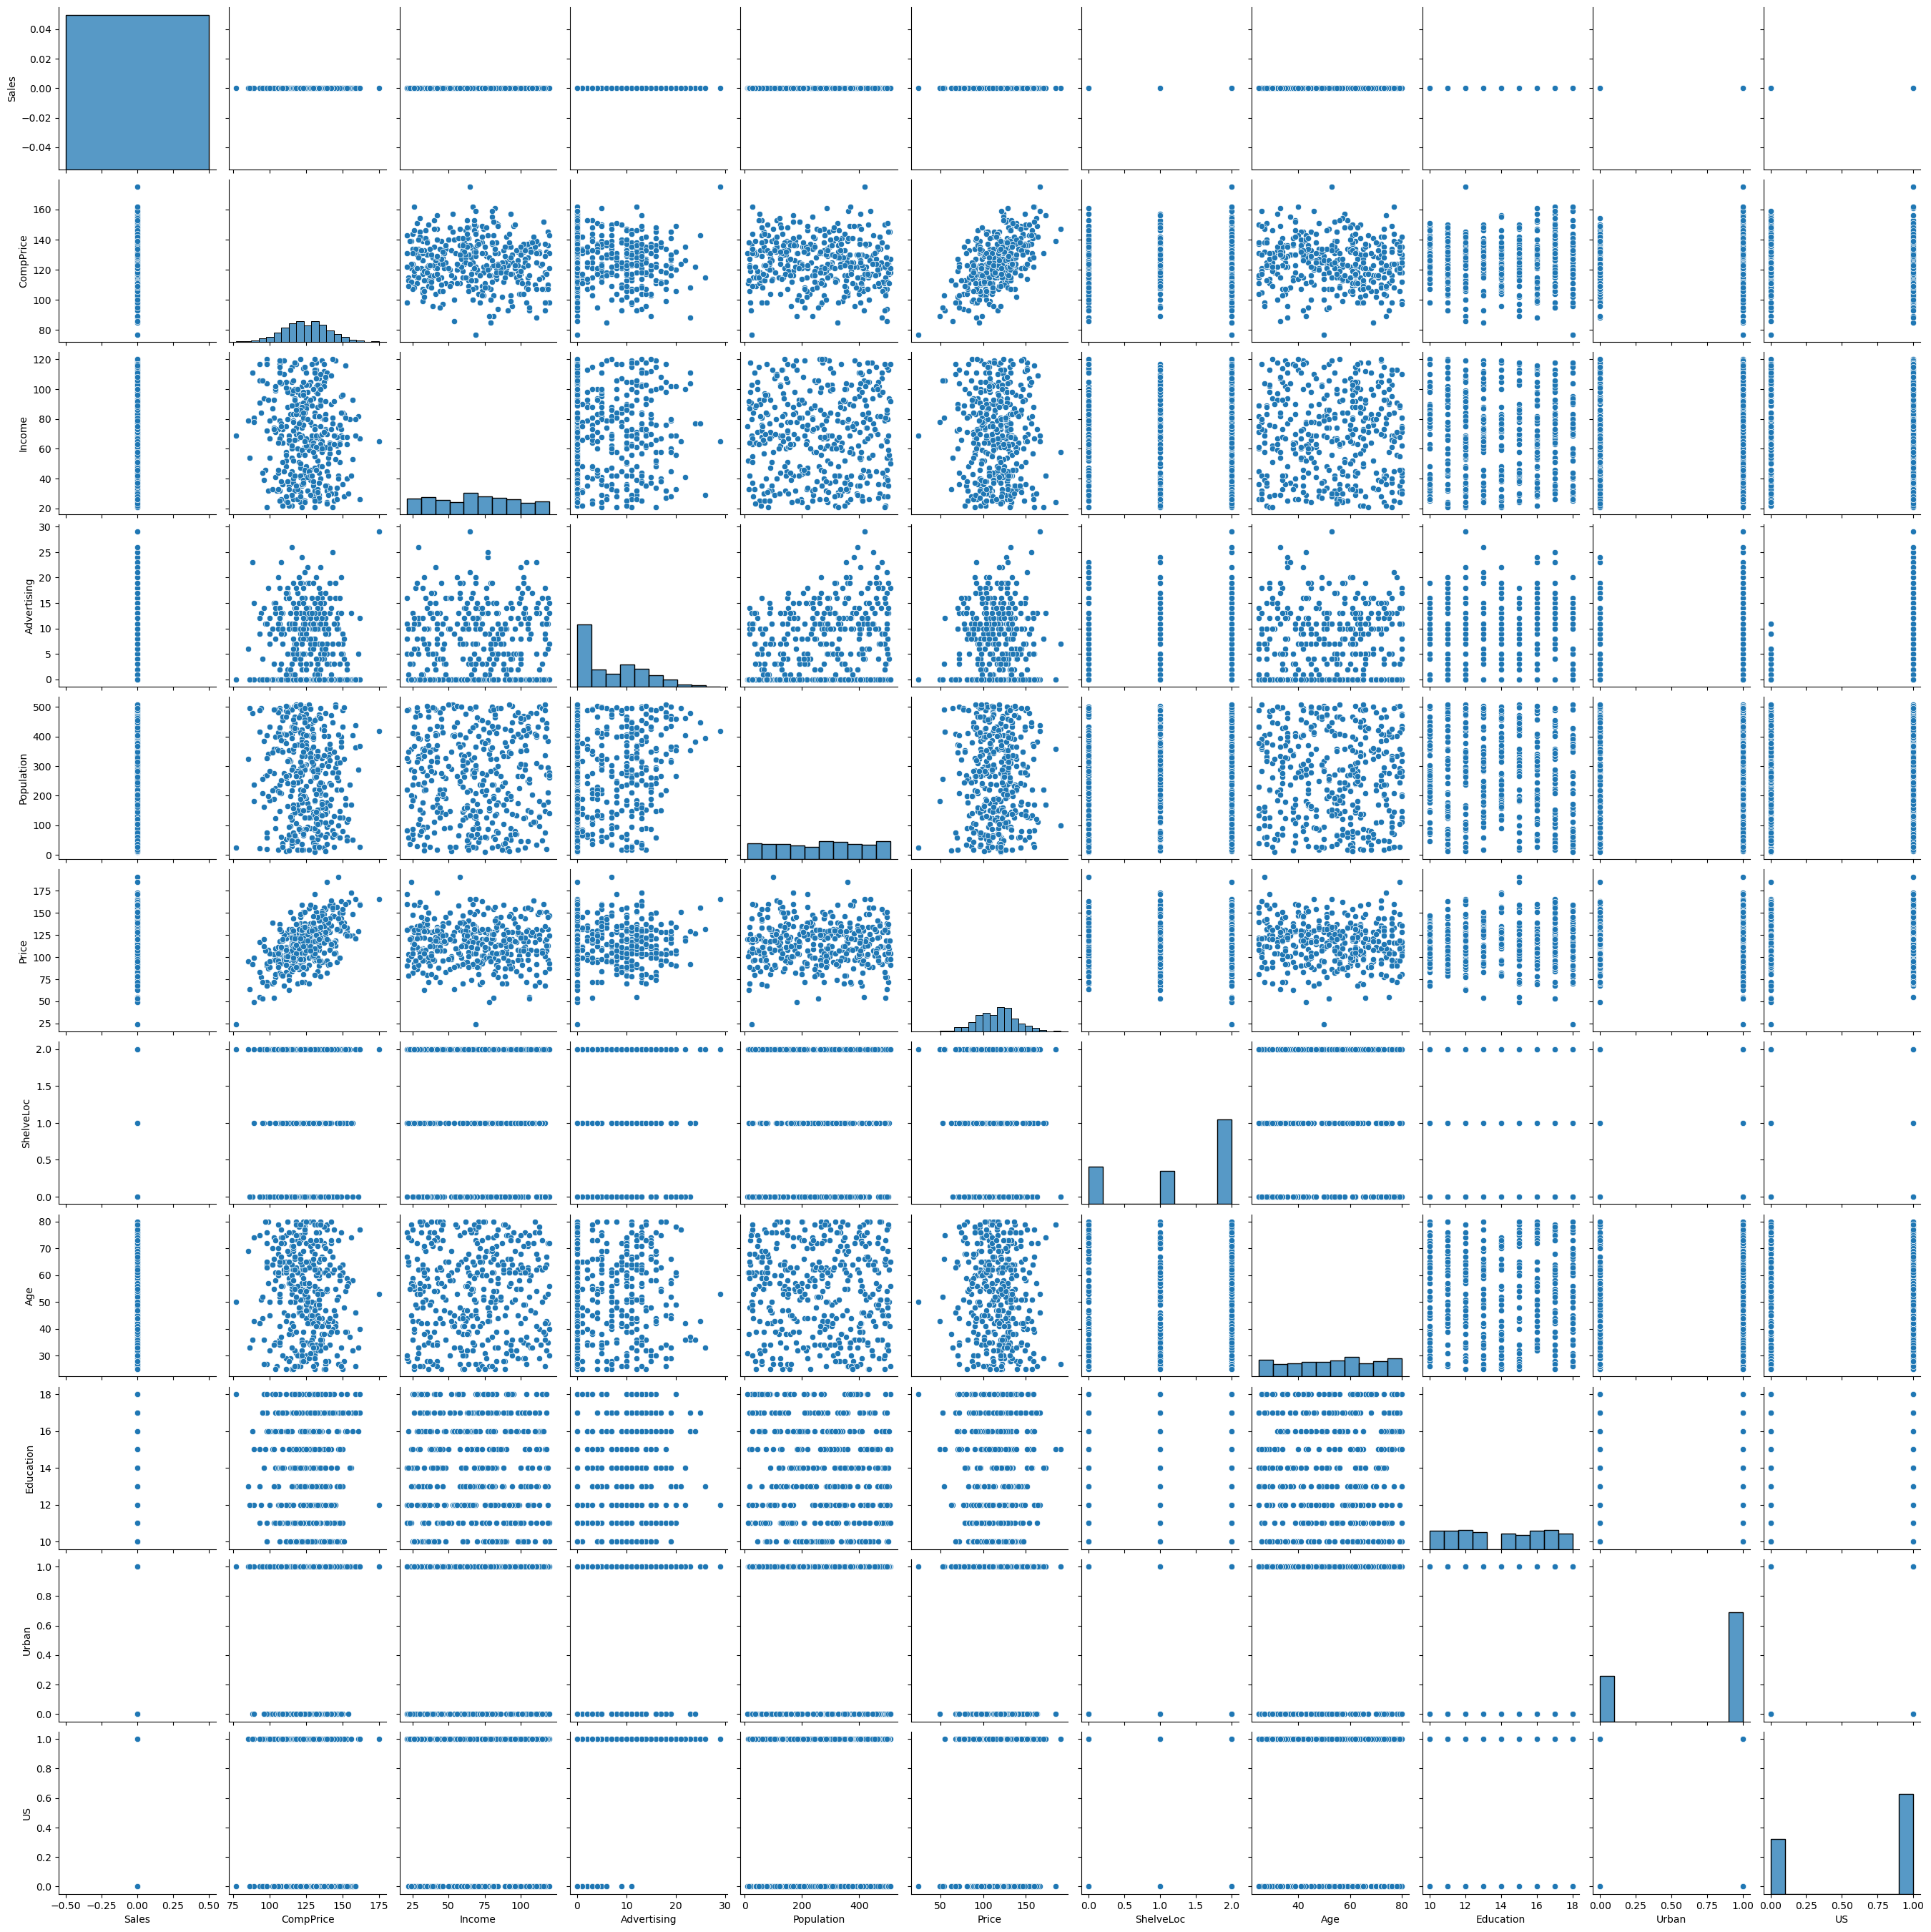

In [49]:
sns.pairplot(data)

<Axes: >

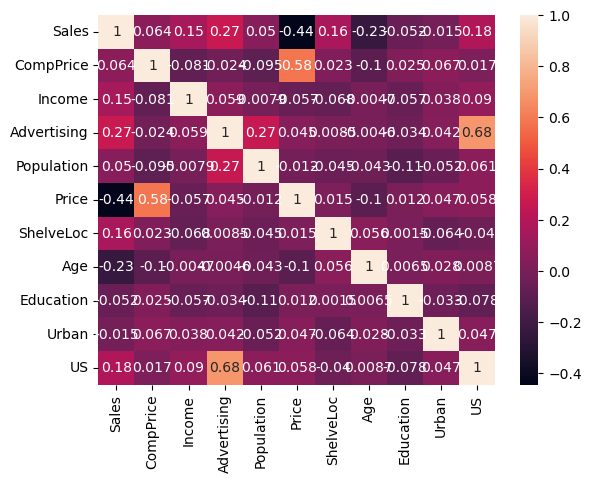

In [40]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Urban', ylabel='count'>

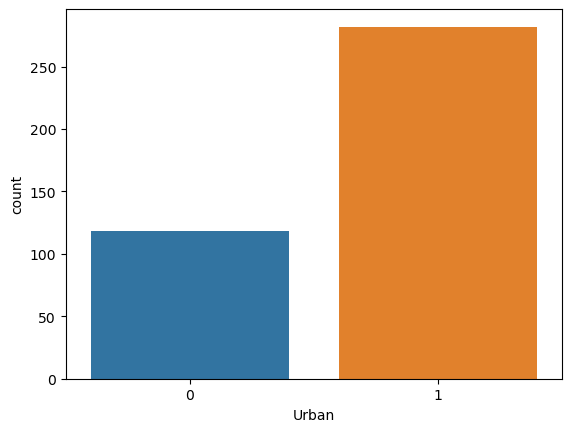

In [46]:

sns.countplot(x='Urban',data=data)

<Axes: xlabel='US', ylabel='count'>

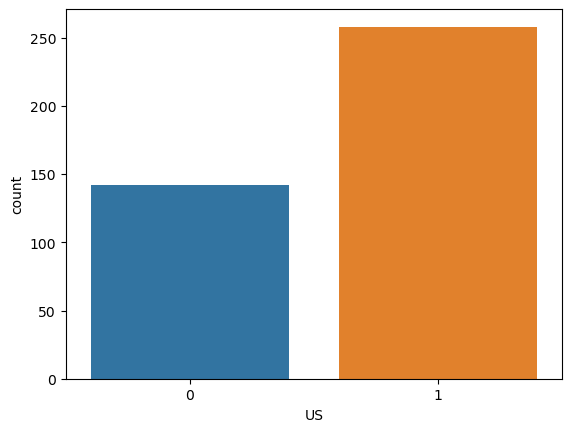

In [47]:
sns.countplot(x='US',data=data)

<Axes: xlabel='ShelveLoc', ylabel='count'>

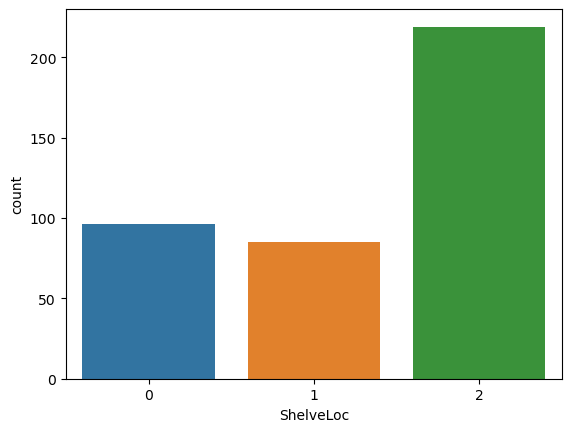

In [48]:

sns.countplot(x='ShelveLoc',data=data)
     

In [41]:
data_mapping = {'Low': 0, 'Medium': 1, 'High': 2} 
data['Sales'] = data['Sales'].map(data_mapping)


In [42]:
data['Sales']=lb.fit_transform(data['Sales'])
x = data.iloc[:,: 9]
y = data.iloc[:,10:]

In [43]:
num_trees=100
max_features=4
seed=10
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features,random_state=seed)
results=cross_val_score(model,x,y,cv=KFold(n_splits=5,random_state=seed,shuffle=True))
results.mean()*100

90.49999999999999

In [44]:
model.fit(x,y)
print(model.feature_importances_)

[0.         0.05166244 0.05796922 0.64736507 0.07636043 0.05138872
 0.01467476 0.06594824 0.03463112]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
     

estimators=[]
model3=LogisticRegression()
estimators.append(('Logistic',model3))
model4=SVC()
estimators.append(('SVC',model4))
model5=DecisionTreeClassifier()
estimators.append(('DecisionTreeClassifier',model5))
     

ensemble=VotingClassifier(estimators)
results_stack = cross_val_score(ensemble, x, y, cv=KFold(n_splits=5))
print(results_stack.mean()*100)

86.75
